In [5]:
from tensorflow.keras.models import load_model



In [8]:
model = load_model('C:/Users/User/Documents/ai/assignment2/best_model1.h5')

In [10]:

import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_indices = [2, 3, 4, 5, 7]

In [12]:
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4}

# Load the CIFAR-10 test dataset
(_, _), (x_test, y_test) = cifar10.load_data()
y_test = y_test.flatten() 

In [13]:
test_filter = np.isin(y_test, class_indices)
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

In [72]:
print(f"x_train test: {x_test_filtered.shape}")

x_train test: (5000, 32, 32, 3)


In [14]:
y_test_filtered = np.vectorize(class_map.get)(y_test_filtered)

# Normalize test data
x_test_filtered = x_test_filtered / 255.0

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_filtered, y_test_filtered, verbose=1)

# Print evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

157/157 [==============================] - 15s 92ms/step - loss: 0.4892 - accuracy: 0.8286
Test Loss: 0.4892
Test Accuracy: 0.8286


157/157 [==============================] - 6s 36ms/step

Classification Report:
              precision    recall  f1-score   support

        bird       0.85      0.83      0.84      1000
         cat       0.77      0.77      0.77      1000
        deer       0.84      0.83      0.83      1000
         dog       0.79      0.82      0.80      1000
       horse       0.90      0.89      0.90      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



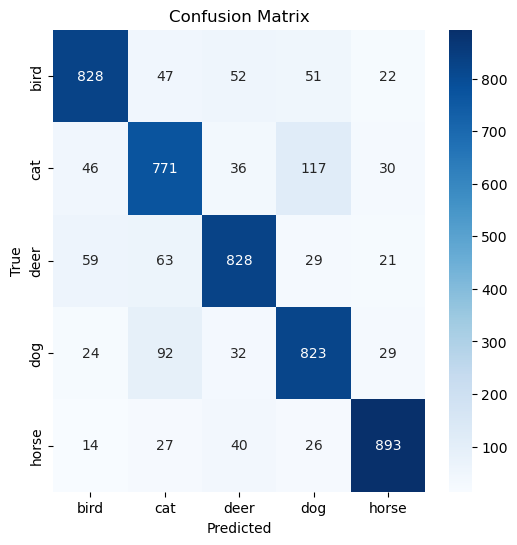

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume x_test_filtered and y_test_filtered are already defined and contain only the chosen classes (cat and dog)
# Model prediction for filtered test data
predictions = model.predict(x_test_filtered)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate a confusion matrix
cm = confusion_matrix(y_test_filtered, predicted_labels)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test_filtered, predicted_labels, target_names=chosen_classes))

# Plotting confusion matrix with Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=chosen_classes, yticklabels=chosen_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def test_single_image(image_path, model, chosen_classes, class_map, target_size=(32, 32), display_size=(16, 16)):
    """
    Test a single image using a model trained on a subset of CIFAR-10 classes.
    Args:
        image_path (str): Path to the image file.
        model (keras.Model): Pre-loaded trained model.
        chosen_classes (list): List of chosen class names corresponding to the model output.
        class_map (dict): Map of original class labels to new indices.
        target_size (tuple): Target size for resizing the image (default: (32, 32)).
        display_size (tuple): Size for resizing image to be displayed (default: (16, 16)).
    """
    # Load and preprocess the image (for prediction purposes)
    img1=load_img(image_path)
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]  # Predicted index (0-4 for chosen classes)
    
    # Reverse the class_map to get original class labels for output (back to CIFAR-10 original class indices)
    original_class_label = list(class_map.keys())[list(class_map.values()).index(predicted_class_idx)]
    
    # Map this back to the chosen class
    predicted_label = chosen_classes[predicted_class_idx]

    # Display the original image without resizing

    plt.imshow(img1)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    


    # Print prediction details
    print(f"Predicted Class Index: {predicted_class_idx}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Confidence Scores: {predictions[0]}")
    print(f"Original Class Label (CIFAR-10): {original_class_label}")


157/157 [==============================] - 6s 35ms/step


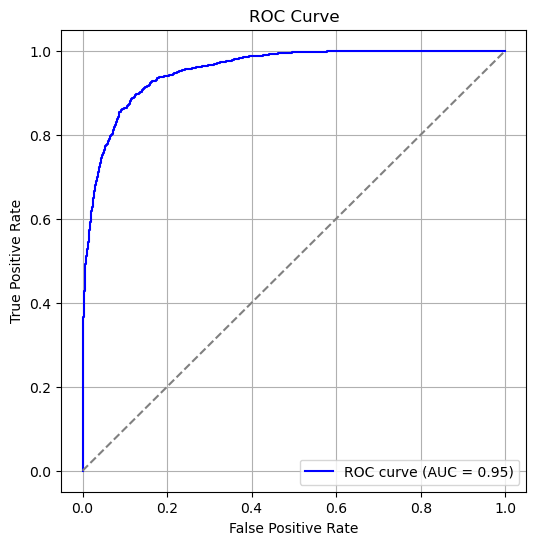

AUC (Area Under the Curve): 0.95


In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Assuming you already have predictions from the model
# Get predicted probabilities
predictions = model.predict(x_test_filtered)

# Binarize the labels for 'cat' and 'dog' classes to 0 and 1
lb = LabelBinarizer()
y_test_filtered_bin = lb.fit_transform(y_test_filtered)

# Calculate the ROC curve and AUC for each class (e.g., 'cat' vs the rest)
fpr, tpr, thresholds = roc_curve(y_test_filtered_bin[:, 1], predictions[:, 1])  # Now using the binary encoded labels and corresponding class index

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally print the AUC value
print(f'AUC (Area Under the Curve): {roc_auc:.2f}')



1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 1
Predicted Label: cat
Confidence Scores: [4.6653125e-02 9.5032275e-01 1.5301986e-03 9.3494216e-04 5.5910263e-04]
Original Class Label (CIFAR-10): 3


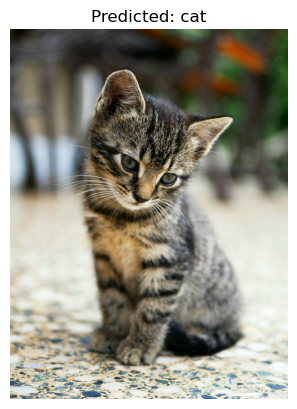

1/1 [==============================] - 0s 12ms/step
Predicted Class Index: 1
Predicted Label: cat
Confidence Scores: [1.4527631e-01 8.1901550e-01 1.2148035e-02 2.3529464e-02 3.0803483e-05]
Original Class Label (CIFAR-10): 3


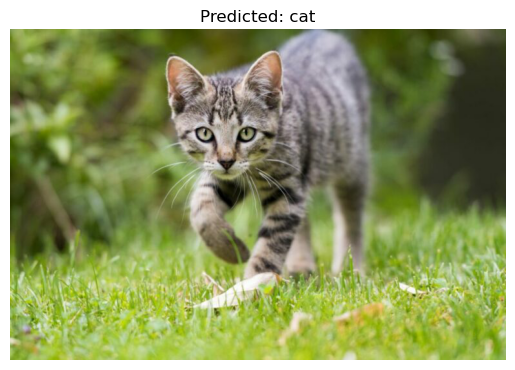

1/1 [==============================] - 0s 15ms/step
Predicted Class Index: 1
Predicted Label: cat
Confidence Scores: [2.1148915e-03 9.9719942e-01 3.7939328e-04 2.2240989e-04 8.3855753e-05]
Original Class Label (CIFAR-10): 3


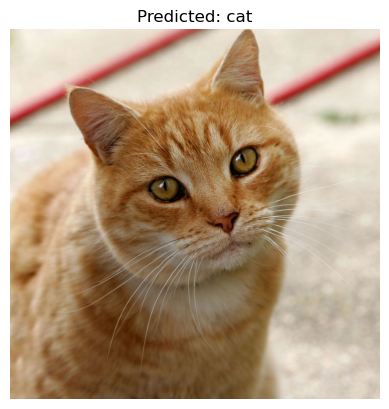

1/1 [==============================] - 0s 23ms/step
Predicted Class Index: 1
Predicted Label: cat
Confidence Scores: [0.09851918 0.64292264 0.01288106 0.22969007 0.01598702]
Original Class Label (CIFAR-10): 3


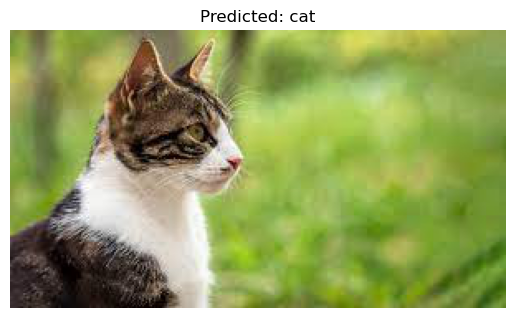

1/1 [==============================] - 0s 17ms/step
Predicted Class Index: 1
Predicted Label: cat
Confidence Scores: [3.9561473e-05 9.9517882e-01 2.1154607e-04 4.5679510e-03 2.2954569e-06]
Original Class Label (CIFAR-10): 3


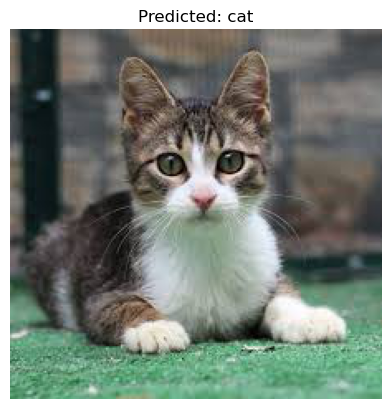

In [47]:
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4} 

for i in range(5):
    image_path = f'C:/Users/User/Documents/ai/assignment2/cat{i+1}.jpg'  # Correctly format the string
    test_single_image(image_path, model, chosen_classes, class_map, target_size=(32, 32), display_size=(4, 4))

    plt.show()


1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 3
Predicted Label: dog
Confidence Scores: [1.2442599e-04 1.0313689e-03 5.3447555e-04 9.9738544e-01 9.2435128e-04]
Original Class Label (CIFAR-10): 5


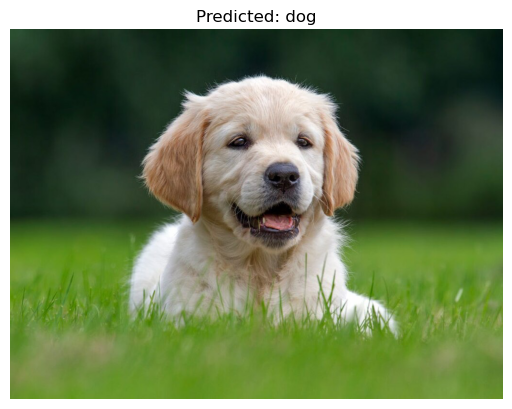

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 3
Predicted Label: dog
Confidence Scores: [1.1957343e-03 1.7564710e-04 3.8513623e-09 9.9823630e-01 3.9232330e-04]
Original Class Label (CIFAR-10): 5


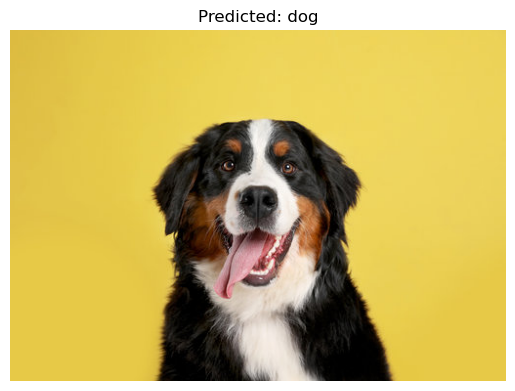

1/1 [==============================] - 0s 15ms/step
Predicted Class Index: 3
Predicted Label: dog
Confidence Scores: [1.2481130e-03 6.8640029e-03 2.5858071e-05 9.8676687e-01 5.0950502e-03]
Original Class Label (CIFAR-10): 5


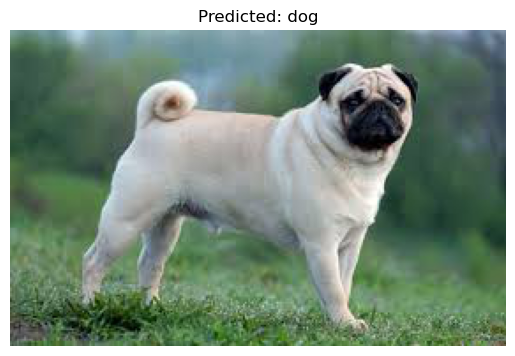

1/1 [==============================] - 0s 15ms/step
Predicted Class Index: 2
Predicted Label: deer
Confidence Scores: [0.05012752 0.00245341 0.87532383 0.00772078 0.06437443]
Original Class Label (CIFAR-10): 4


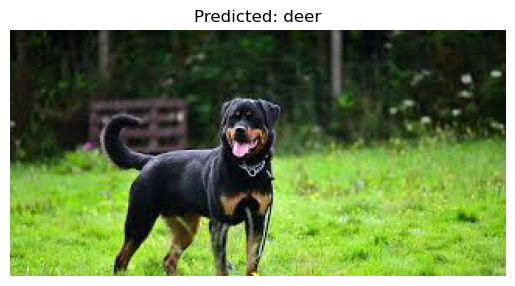

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 3
Predicted Label: dog
Confidence Scores: [3.1688473e-05 2.0798987e-03 7.5149910e-07 9.9768001e-01 2.0767830e-04]
Original Class Label (CIFAR-10): 5


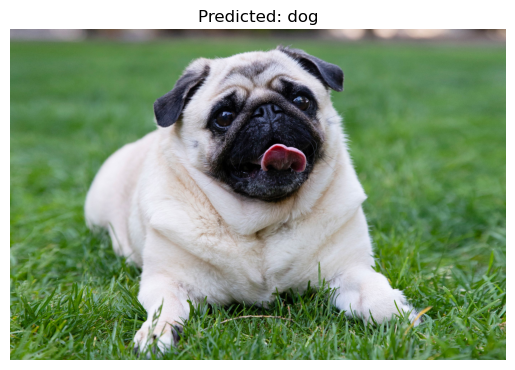

1/1 [==============================] - 0s 30ms/step
Predicted Class Index: 3
Predicted Label: dog
Confidence Scores: [2.3072469e-03 2.6632464e-02 1.3132163e-04 9.6716064e-01 3.7683097e-03]
Original Class Label (CIFAR-10): 5


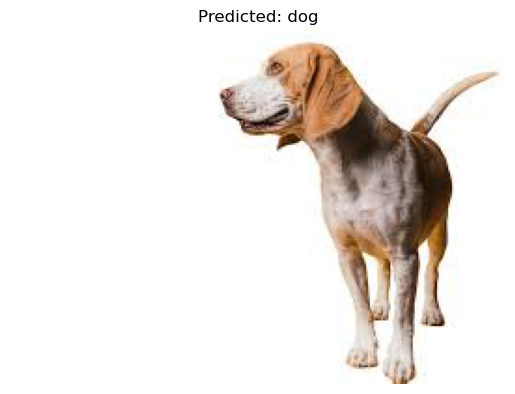

In [54]:
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4} 

for i in range(6):
    image_path = f'C:/Users/User/Documents/ai/assignment2/dog ({i+1}).jpg'  # Correctly format the string
    test_single_image(image_path, model, chosen_classes, class_map, target_size=(32, 32), display_size=(4, 4))

    plt.show()

1/1 [==============================] - 0s 27ms/step
Predicted Class Index: 0
Predicted Label: bird
Confidence Scores: [6.1441535e-01 3.4091845e-01 5.7862049e-05 4.4570599e-02 3.7726386e-05]
Original Class Label (CIFAR-10): 2


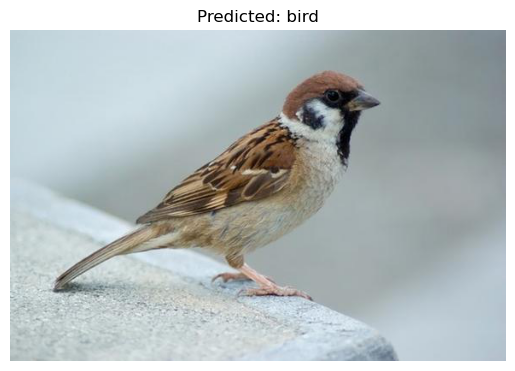

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 0
Predicted Label: bird
Confidence Scores: [9.9141920e-01 2.2810339e-03 1.0052589e-05 6.2555633e-03 3.4211003e-05]
Original Class Label (CIFAR-10): 2


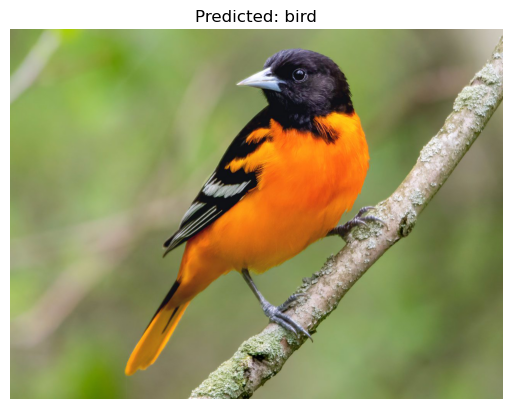

1/1 [==============================] - 0s 24ms/step
Predicted Class Index: 0
Predicted Label: bird
Confidence Scores: [9.9905545e-01 1.5026001e-04 6.3081481e-04 1.4645484e-04 1.6857322e-05]
Original Class Label (CIFAR-10): 2


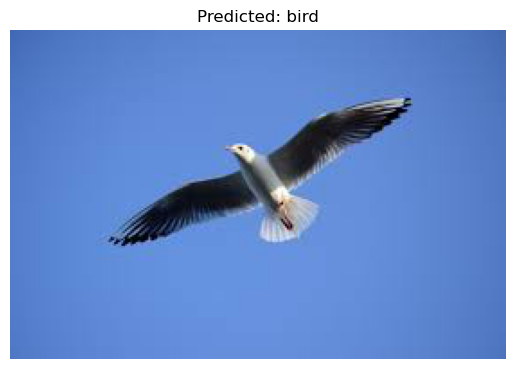

1/1 [==============================] - 0s 15ms/step
Predicted Class Index: 0
Predicted Label: bird
Confidence Scores: [8.3905965e-01 1.7766060e-02 1.7769744e-05 1.4311725e-01 3.9296836e-05]
Original Class Label (CIFAR-10): 2


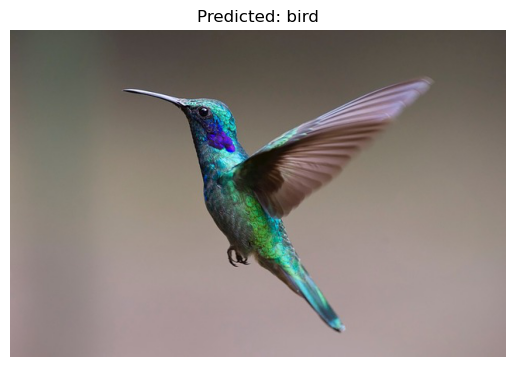

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 3
Predicted Label: dog
Confidence Scores: [0.10637232 0.0220016  0.00114616 0.85874814 0.0117318 ]
Original Class Label (CIFAR-10): 5


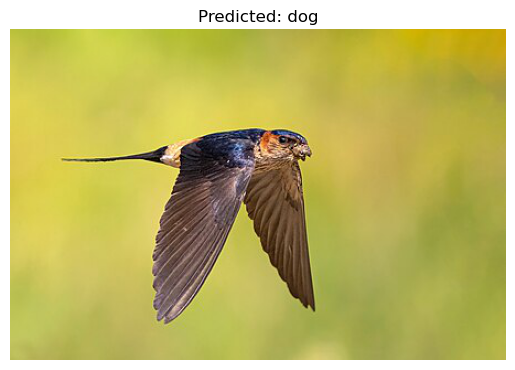

In [62]:
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4} 

for i in range(5):
    image_path = f'C:/Users/User/Documents/ai/assignment2/bird ({i+1}).jpg'  # Correctly format the string
    test_single_image(image_path, model, chosen_classes, class_map, target_size=(32, 32), display_size=(4, 4))

    plt.show()

1/1 [==============================] - 0s 20ms/step
Predicted Class Index: 4
Predicted Label: horse
Confidence Scores: [1.8986495e-06 2.3751384e-01 2.8318774e-03 3.3915916e-01 4.2049316e-01]
Original Class Label (CIFAR-10): 7


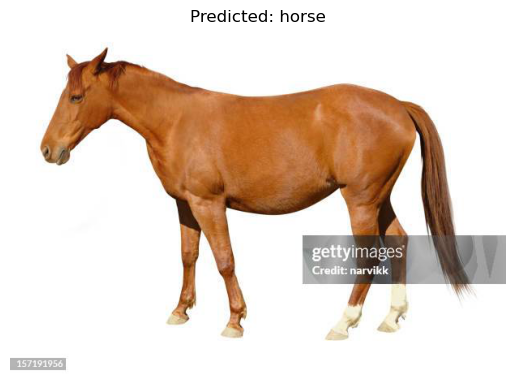

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 4
Predicted Label: horse
Confidence Scores: [0.1125187  0.00129833 0.01301166 0.00288015 0.8702912 ]
Original Class Label (CIFAR-10): 7


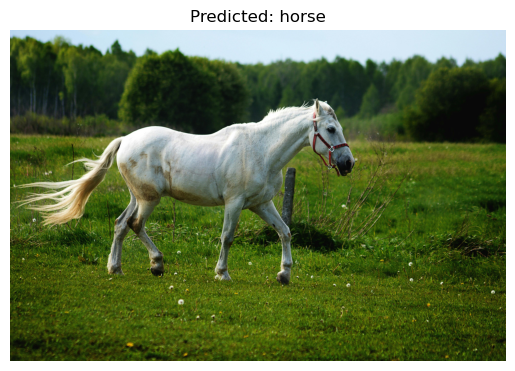

1/1 [==============================] - 0s 19ms/step
Predicted Class Index: 4
Predicted Label: horse
Confidence Scores: [8.662455e-02 4.180707e-03 2.755460e-03 6.024117e-04 9.058368e-01]
Original Class Label (CIFAR-10): 7


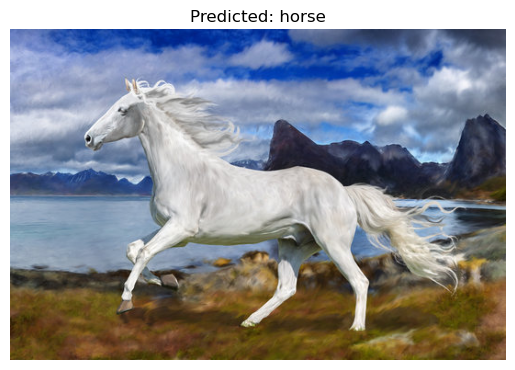

1/1 [==============================] - 0s 25ms/step
Predicted Class Index: 4
Predicted Label: horse
Confidence Scores: [6.5537444e-07 2.6070336e-07 1.3930618e-07 3.0511612e-04 9.9969387e-01]
Original Class Label (CIFAR-10): 7


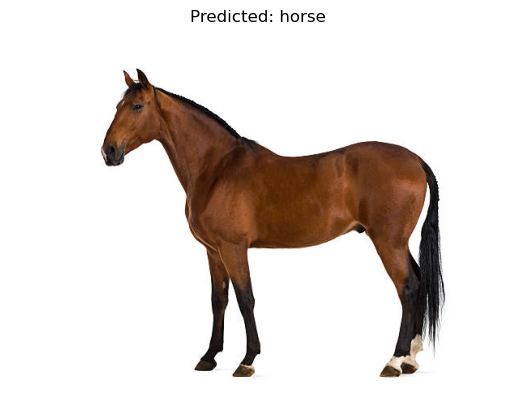

1/1 [==============================] - 0s 18ms/step
Predicted Class Index: 4
Predicted Label: horse
Confidence Scores: [0.17110775 0.02930252 0.00886241 0.00527912 0.7854482 ]
Original Class Label (CIFAR-10): 7


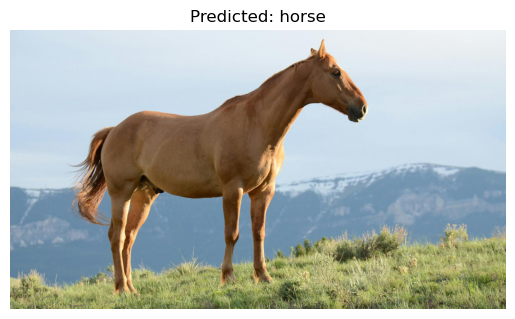

In [63]:
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4} 

for i in range(5):
    image_path = f'C:/Users/User/Documents/ai/assignment2/horse ({i+1}).jpg'  # Correctly format the string
    test_single_image(image_path, model, chosen_classes, class_map, target_size=(32, 32), display_size=(4, 4))

    plt.show()

1/1 [==============================] - 0s 17ms/step
Predicted Class Index: 1
Predicted Label: cat
Confidence Scores: [2.0289890e-01 7.7659863e-01 1.2233386e-02 5.8746850e-04 7.6815356e-03]
Original Class Label (CIFAR-10): 3


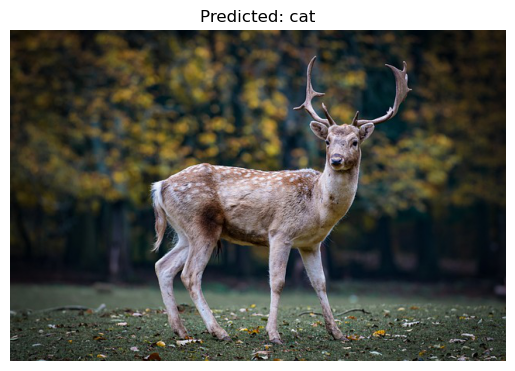

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 0
Predicted Label: bird
Confidence Scores: [5.2930981e-01 2.4694277e-02 4.4587001e-01 2.0290177e-05 1.0556681e-04]
Original Class Label (CIFAR-10): 2


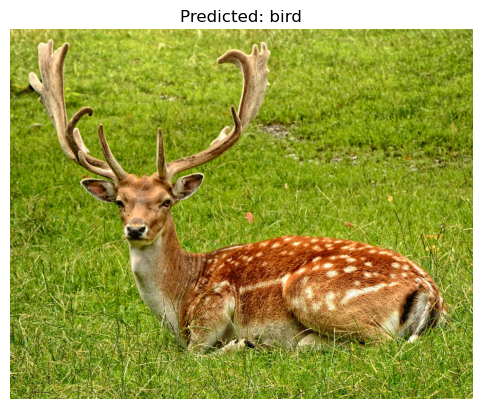

1/1 [==============================] - 0s 16ms/step
Predicted Class Index: 2
Predicted Label: deer
Confidence Scores: [0.32584873 0.02128132 0.3310836  0.02133585 0.30045056]
Original Class Label (CIFAR-10): 4


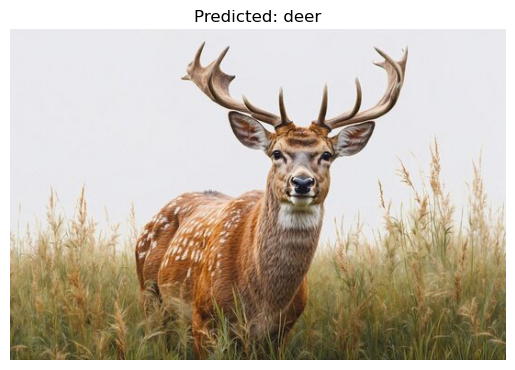

1/1 [==============================] - 0s 17ms/step
Predicted Class Index: 2
Predicted Label: deer
Confidence Scores: [4.6868108e-02 4.6259146e-03 9.0334404e-01 4.5061640e-02 1.0039026e-04]
Original Class Label (CIFAR-10): 4


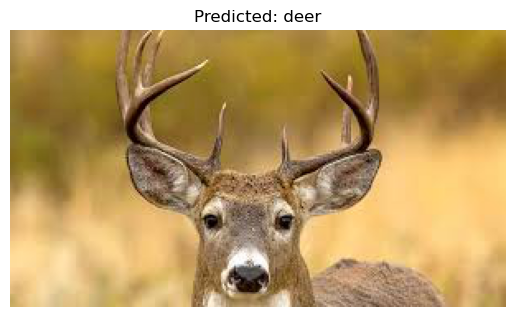

1/1 [==============================] - 0s 15ms/step
Predicted Class Index: 2
Predicted Label: deer
Confidence Scores: [0.15910122 0.04359395 0.72843117 0.06106989 0.00780387]
Original Class Label (CIFAR-10): 4


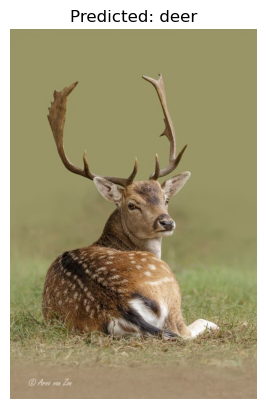

1/1 [==============================] - 0s 19ms/step
Predicted Class Index: 0
Predicted Label: bird
Confidence Scores: [9.0309387e-01 9.4322465e-02 1.5682129e-03 9.2047150e-04 9.4964831e-05]
Original Class Label (CIFAR-10): 2


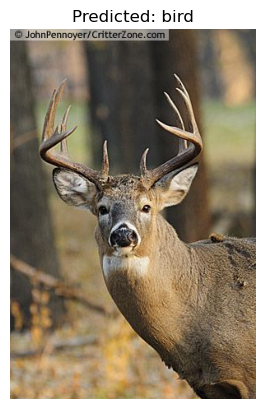

In [68]:
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4} 

for i in range(6):
    image_path = f'C:/Users/User/Documents/ai/assignment2/deer ({i+1}).jpg'  # Correctly format the string
    test_single_image(image_path, model, chosen_classes, class_map, target_size=(32, 32), display_size=(4, 4))

    plt.show()